In [1]:
# Multi-Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import pylab          
import scipy.stats as st

In [2]:
data = pd.read_csv("D:\\Excel R Course\\Assignments\\Assignment 5 (Multi Linear Regression)\\50_Startups.csv")

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [13]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [19]:
data.duplicated().sum()   # duplicated values in dataset 

0

In [31]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [26]:
data.notnull().sum()        # find out not null values

R&D Spend          50
Administration     50
Marketing Spend    50
State              50
Profit             50
dtype: int64

In [4]:
data.isnull().sum()    # find out null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [3]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


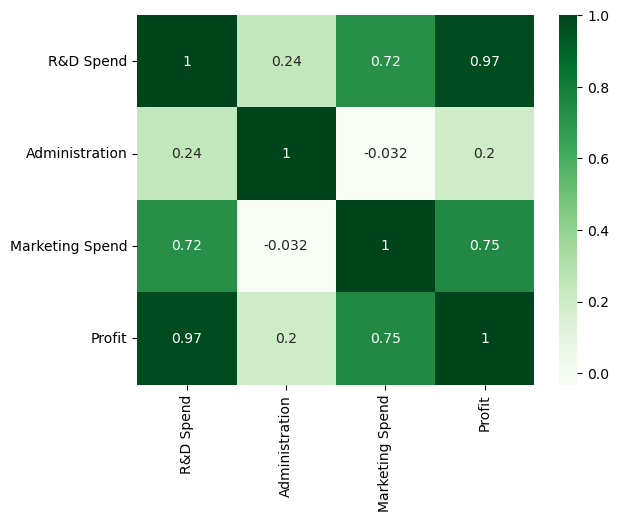

In [16]:
sns.heatmap(corr,cmap = 'Greens',annot = True)
plt.show()

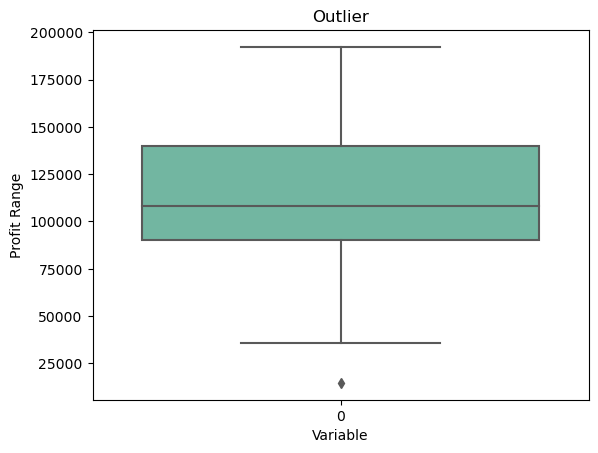

In [6]:
sns.boxplot(data = data['Profit'], palette = 'Set2',)

plt.title('Outlier')
plt.ylabel('Profit Range')
plt.xlabel('Variable')

plt.show()

<AxesSubplot:xlabel='State', ylabel='Profit'>

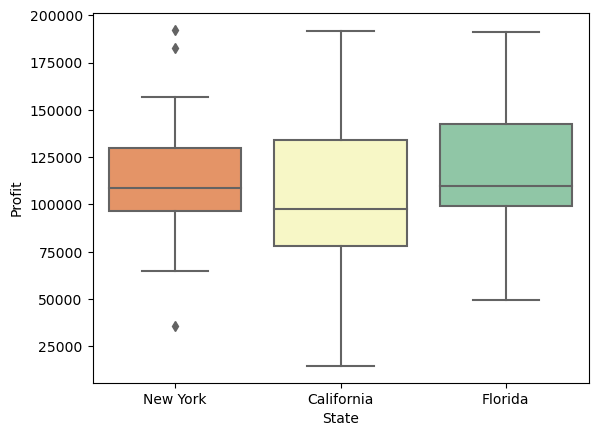

In [20]:
sns.boxplot(x = 'State', y =  'Profit', data = data, palette = 'Spectral')

# Outlier present in New York

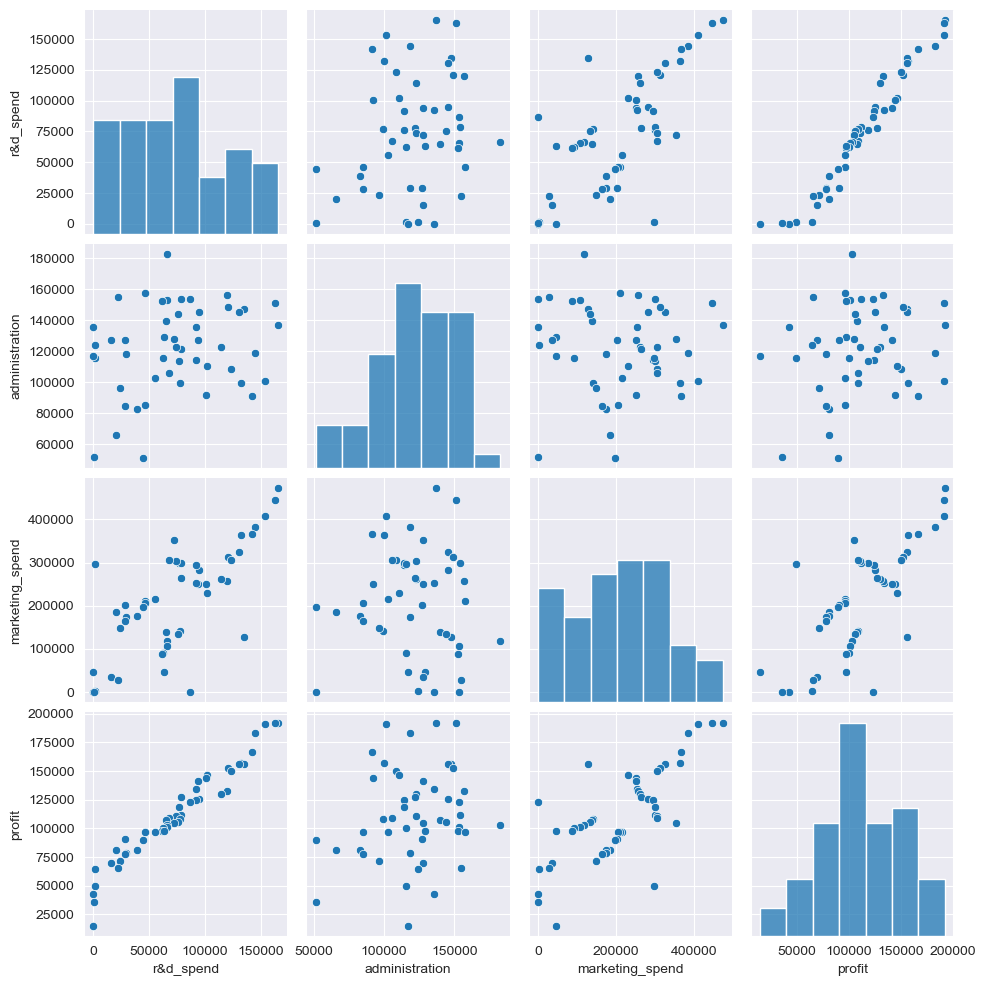

In [31]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data)
plt.show()

In [3]:
data = data.rename({ 'R&D Spend' : 'rnd', 'Administration' : 'administration', 'Marketing Spend' :'marketing','State' : 'state', 'Profit' : 'profit'},axis = True)

In [4]:
data.head()

,rnd,administration,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Model Building

In [12]:
# Spliting data in dependent and independent variables ( dividing data into input and output)


x = data.iloc[:,:-1]   # Independent variables [:,:-1] means all rows, and column '0' to '3' - from 'R&D' TO 'STATE'

y = data.iloc[:,4]     # dependent variables [:,4] means all rows, and '4' index column - 'PROFIT'

In [13]:
x.head()

,rnd,administration,marketing,state
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [42]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: profit, dtype: float64

In [14]:
# convert the column into categorical columns

states = pd.get_dummies(x['state'])
states.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [15]:
# Drop the state column

x = x.drop('state', axis = 1)

In [16]:
x.head()

,rnd,administration,marketing
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [17]:
# concate the dummy variables

x = pd.concat([x,states],axis = 1)

In [18]:
x.head()

,rnd,administration,marketing,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [19]:
# divide the data into testing and training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.2, random_state = 0)


In [20]:
x_train.head()

,rnd,administration,marketing,California,Florida,New York
36,28663.76,127056.21,201126.82,0,1,0
21,78389.47,153773.43,299737.29,0,0,1
19,86419.70,153514.11,0.00,0,0,1
9,123334.88,108679.17,304981.62,1,0,0
39,38558.51,82982.09,174999.30,1,0,0


In [50]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
Name: profit, dtype: float64

In [51]:
# Fitting datasset into the training set and test set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [52]:
# predicting the test set

y_pred = lr.predict(x_test)
y_pred

array([117126.70277522, 136353.43123955, 154866.10395978,  87795.01634397,
       200500.8779395 , 107171.97607315,  67068.16608257, 101294.12858994,
       125158.0162769 , 191544.16615373, 111390.19919486,  89622.25061194,
       128928.241092  ,  79677.28671271, 143132.94690165, 176645.18169734,
       167493.75212888,  48314.4747871 ,  54157.61058752, 105065.75252076,
       150620.66545455, 119697.02235509, 102620.78149324, 111693.71044141,
        64736.96257498, 109795.04699661,  61080.92520261, 152868.46567268,
       124196.27007281, 100585.03690586, 166632.62073425, 129111.60170865,
        67079.74210357,  42915.26813874, 185618.28003349, 145181.37554749,
        86931.63646708, 119802.54178757, 167241.9930504 , 120392.82714274])

In [58]:
# compare predicted values and actual values

df = pd.DataFrame(data = {'Predicted_values' : y_pred, 'Actual_value' : y_test })
df

,Predicted_values,Actual_value
28,117126.702775,103282.38
11,136353.431240,144259.40
10,154866.103960,146121.95
41,87795.016344,77798.83
2,200500.877940,191050.39
27,107171.976073,105008.31
38,67068.166083,81229.06
31,101294.128590,97483.56
22,125158.016277,110352.25
4,191544.166154,166187.94


In [61]:
# r-squared score

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

# r-squared score is help to find the variance or the spread of the target

0.8481562802717446

In [62]:
# mean Squared error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
mse

# By using this approach we can find that how much the regression best fit line is close to all the residual.

205874045.55534843

In [65]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred, y_test)
mae

12199.9308772074

# Preparing  New Model 


In [5]:

import statsmodels.formula.api as smf     
                
model2 = smf.ols('profit~administration+rnd+marketing+state',data=data).fit() 


In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.34e-27
Time:                        23:37:21   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
state[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
state[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
rnd                   0.8060      0.046     17.369      0.000       0.712       0.900
marketing             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

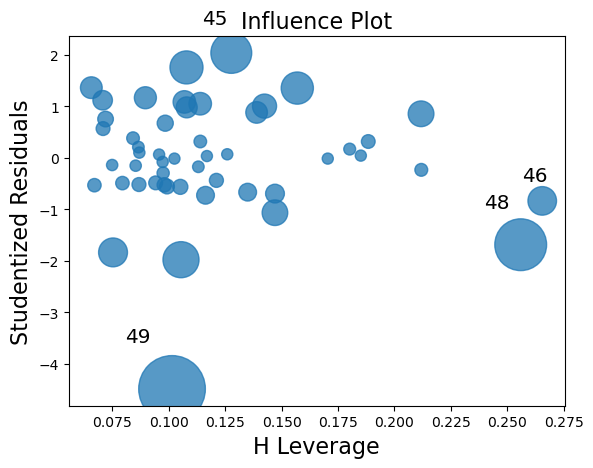

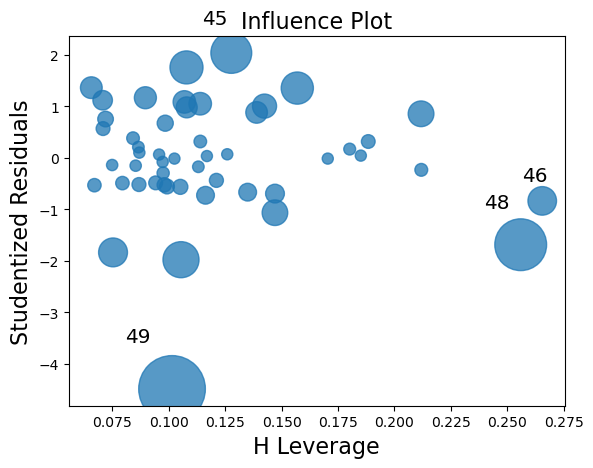

In [26]:
import statsmodels.api as sm

sm.graphics.influence_plot(model2)

In [6]:
datanew = data.drop(data.index[[46,48,49]],axis = 0) 

In [29]:
datanew

,rnd,administration,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
# Preparing new model   

modeln = smf.ols('profit~administration+rnd+marketing+state',data=data).fit() 


In [31]:
modeln.params

Intercept            50125.343832
state[T.Florida]       198.788793
state[T.New York]      -41.887019
administration          -0.027004
rnd                      0.806023
marketing                0.026980
dtype: float64

In [32]:
modeln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.34e-27
Time:                        23:49:31   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
state[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
state[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
rnd                   0.8060      0.046     17.369      0.000       0.712       0.900
marketing             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


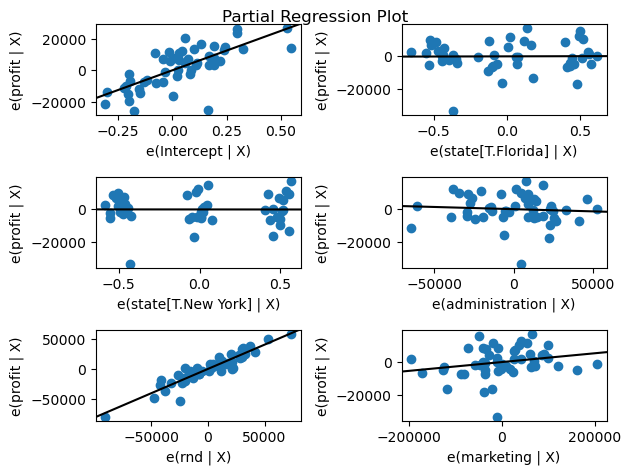

In [37]:
sm.graphics.plot_partregress_grid(modeln)     # varible plot
plt.show()

In [12]:
pred2 = modeln.predict(datanew)

pred2

0     192390.571364
1     189071.320106
2     182276.186734
3     173584.976191
4     172277.133818
5     163473.807119
6     158099.292788
7     160155.644650
8     151634.743327
9     154829.662528
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301169
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236604
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746175
41     74956.311048
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
47     46468.232004
dtype: float64

In [ ]:
# Linearity

Text(0, 0.5, 'fitted_values')

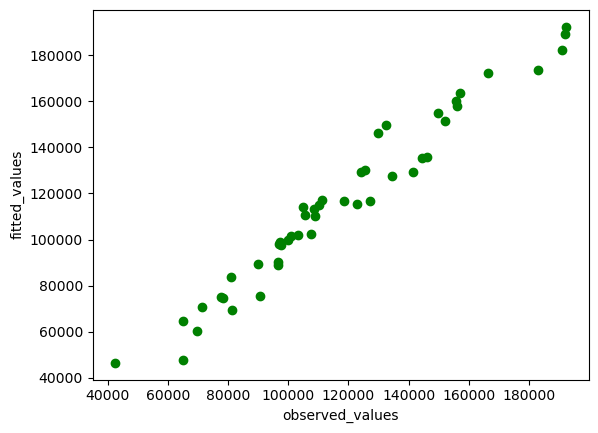

In [45]:
# 1. Observed values VS Fitted values

plt.scatter(datanew.profit,pred2,c="g");
plt.xlabel("observed_values");
plt.ylabel("fitted_values")

# Normality plot for residuals

(array([ 1.,  0.,  0.,  3.,  1., 12., 15.,  6.,  9.,  3.]),
 array([-3.54941245, -3.01079354, -2.47217463, -1.93355571, -1.3949368 ,
        -0.85631788, -0.31769897,  0.22091994,  0.75953886,  1.29815777,
         1.83677668]),
 <BarContainer object of 10 artists>)

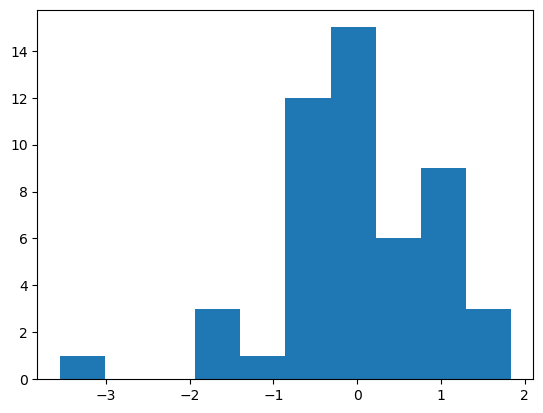

In [47]:
# 1. Histogram help to understand standardized residuals are normally distributed

plt.hist(modeln.resid_pearson) 


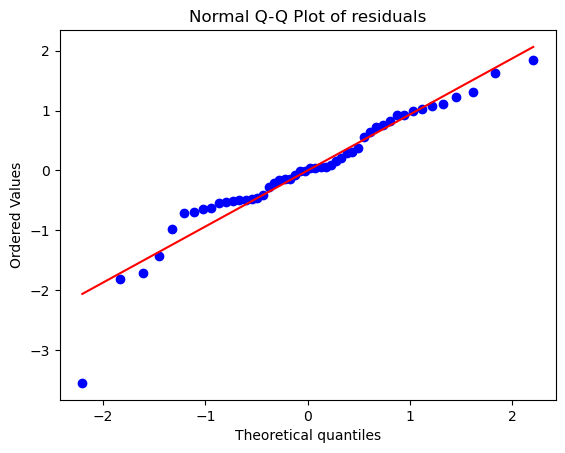

In [51]:
# 2. QQ plot for residuals / probability Plot
         
import statsmodels.api as sm
import pylab          
import scipy.stats as st


st.probplot(modeln.resid_pearson, dist="norm", plot=pylab)
plt.title('Normal Q-Q Plot of residuals')
plt.show()